In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [280]:
cc09 = pd.read_csv('City Council/2009_November Municipal (General) City Council At Large Results.csv')
cc19 = pd.read_csv('City Council/2019_November Municipal (General) City Council At Large Results.csv')
m09 = pd.read_csv('Mayoral Election/2009_November Municipal (General) Mayoral Results.csv')
m17 = pd.read_csv('Mayoral Election/2017_November Municipal (General) Mayoral Results.csv')

df = pd.DataFrame(columns=['Ward/Precinct', 'CC Ballots 2009', 'CC Ballots 2019',
                           'M Ballots 2009', 'M Ballots 2017', 'CVAP 2009', 'CVAP 2017', 'CVAP 2019', 
                           'CC Voter Turnout 2009', 'CC Voter Turnout 2019', 'M Voter Turnout 2009', 
                           'M Voter Turnout 2017', 'CC % Net Change','M % Net Change', 'CC Net Change', 
                           'M Net Change', 'Neighborhood'])
df['Ward/Precinct'] = cc09['Ward/Precinct']
df['CC Ballots 2009'] = cc09['BALLOTS CAST']
df['CC Ballots 2019'] = cc19['BALLOTS CAST']
df['M Ballots 2009'] = m09['BALLOTS CAST']
df['M Ballots 2017'] = m17['BALLOTS CAST']

for i in range(len(df)):
    df.loc[i, 'CC Voter Turnout 2009'] = round(cc09.loc[i, 'BALLOTS CAST']/cc09.loc[i, 'CVAP'],2)
    df.loc[i, 'CC Voter Turnout 2019'] = round(cc19.loc[i, 'BALLOTS CAST']/cc19.loc[i, 'CVAP'],2)
    df.loc[i, 'M Voter Turnout 2009'] = round(m09.loc[i, 'BALLOTS CAST']/m09.loc[i, 'CVAP'],2)
    df.loc[i, 'M Voter Turnout 2017'] = round(m17.loc[i, 'BALLOTS CAST']/m17.loc[i, 'CVAP'],2)
    df.loc[i, 'CVAP 2009'] = cc09.loc[i, 'CVAP']
    df.loc[i, 'CVAP 2017'] = m17.loc[i, 'CVAP']
    df.loc[i, 'CVAP 2019'] = cc19.loc[i, 'CVAP']
    df.loc[i, 'CC % Net Change'] = df.loc[i, 'CC Voter Turnout 2019'] - df.loc[i, 'CC Voter Turnout 2009']
    df.loc[i, 'M % Net Change'] = df.loc[i, 'M Voter Turnout 2017'] - df.loc[i, 'M Voter Turnout 2009']
    df.loc[i, 'CC Net Change'] = df.loc[i, 'CC Ballots 2019'] - df.loc[i, 'CC Ballots 2009']
    df.loc[i, 'M Net Change'] = df.loc[i, 'M Ballots 2017'] - df.loc[i, 'M Ballots 2009']
    df.loc[i, 'Ward/Precinct'] = str(df.loc[i, 'Ward/Precinct'])
    if len(df.loc[i, 'Ward/Precinct']) == 3:
        df.loc[i, 'Ward/Precinct'] = '0' + df.loc[i, 'Ward/Precinct']

In [281]:
neighbs = pd.read_csv('WardPrecinct_Matched_To_Neighborhood.csv').drop('Unnamed: 0', axis=1)
props = pd.read_csv('Neighborhood_Make_Up_Of_Precincts.csv').drop('Unnamed: 0', axis=1)
neighbs['%'] = np.zeros(len(neighbs))

for i in range(len(neighbs)):
    wp = neighbs.loc[i, 'WARD_PRECI']
    filt = neighbs['WARD_PRECI'] == wp
    inds = neighbs.index[filt].tolist()
    for n in inds:
        neighb = neighbs.loc[n, 'NEIGHBORHOOD']
        temp = props[['WARD_PRECI', neighb]]
        filt2 = temp['WARD_PRECI'] == wp
        neighbs.loc[n, '%'] = round(temp[filt2].reset_index(drop=False).loc[0, neighb],4)

In [282]:
for i in range(len(df)):
    wp = df.loc[i, 'Ward/Precinct']
    filt = neighbs['WARD_PRECI'] == wp
    temp = neighbs[filt].sort_values(by=['%']).reset_index(drop=False)
    df.loc[i, 'Neighborhood'] = temp.loc[0, 'NEIGHBORHOOD']
df

,Ward/Precinct,CC Ballots 2009,CC Ballots 2019,M Ballots 2009,M Ballots 2017,CVAP 2009,CVAP 2017,CVAP 2019,CC Voter Turnout 2009,CC Voter Turnout 2019,M Voter Turnout 2009,M Voter Turnout 2017,CC % Net Change,M % Net Change,CC Net Change,M Net Change,Neighborhood
0,0101,397,280,397,495.0,534.0,889.0,889.0,0.74,0.31,0.74,0.56,-0.43,-0.18,-117,98.0,East Boston
1,0102,273,147,273,298.0,814.0,1286.0,1286.0,0.34,0.11,0.34,0.23,-0.23,-0.11,-126,25.0,East Boston
2,0103,600,374,600,711.0,1422.0,1908.0,1908.0,0.42,0.2,0.42,0.37,-0.22,-0.05,-226,111.0,East Boston
3,0104,183,125,183,230.0,537.0,1015.0,1015.0,0.34,0.12,0.34,0.23,-0.22,-0.11,-58,47.0,East Boston
4,0105,286,133,286,355.0,980.0,1169.0,1169.0,0.29,0.11,0.29,0.3,-0.18,0.01,-153,69.0,East Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2209,304,278,304,284.0,1190.0,1185.0,1185.0,0.26,0.23,0.26,0.24,-0.03,-0.02,-26,-20.0,Brighton
250,2210,470,344,470,391.0,1655.0,1904.0,1904.0,0.28,0.18,0.28,0.21,-0.1,-0.07,-126,-79.0,Brighton
251,2211,316,249,316,265.0,1730.0,2046.0,2046.0,0.18,0.12,0.18,0.13,-0.06,-0.05,-67,-51.0,Brighton
252,2212,372,282,372,284.0,1604.0,2052.0,2052.0,0.23,0.14,0.23,0.14,-0.09,-0.09,-90,-88.0,Brighton


In [283]:
neighbs

,WARD_PRECI,NEIGHBORHOOD,%
0,1814,Roslindale,0.0005
1,1814,Hyde Park,0.9995
2,1822,Roslindale,0.2581
3,1822,Hyde Park,0.7419
4,1811,Roslindale,0.3590
...,...,...,...
399,0605,South Boston,0.9521
400,2105,Allston,0.9968
401,2103,Allston,0.9815
402,2104,Allston,1.0000


Text(0, 0.5, 'Net Change')

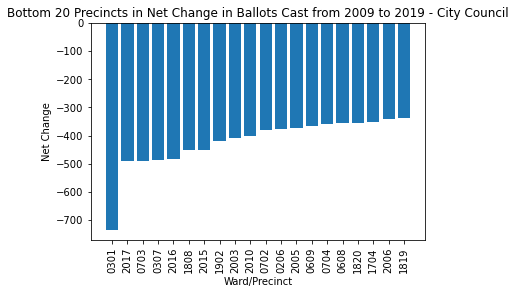

In [298]:
temp = df.sort_values(by=['CC Net Change']).head(20).reset_index(drop=False)
plt.bar(temp['Ward/Precinct'],temp['CC Net Change'])
plt.xticks(rotation=90)
plt.title('Bottom 20 Precincts in Net Change in Ballots Cast from 2009 to 2019 - City Council')
plt.xlabel('Ward/Precinct')
plt.ylabel('Net Change')

Text(0, 0.5, 'Net Change')

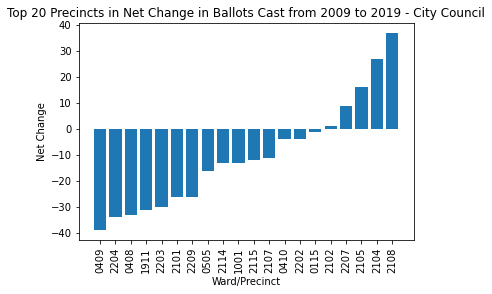

In [299]:
temp2 = df.sort_values(by=['CC Net Change']).tail(20).reset_index(drop=False)
plt.bar(temp2['Ward/Precinct'],temp2['CC Net Change'])
plt.xticks(rotation=90)
plt.title('Top 20 Precincts in Net Change in Ballots Cast from 2009 to 2019 - City Council')
plt.xlabel('Ward/Precinct')
plt.ylabel('Net Change')

Text(0, 0.5, 'Net Change')

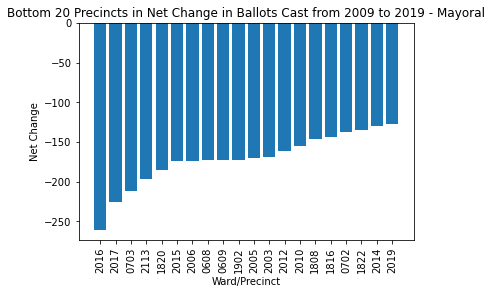

In [300]:
temp1 = df.sort_values(by=['M Net Change']).head(20).reset_index(drop=False)
plt.bar(temp1['Ward/Precinct'],temp1['M Net Change'])
plt.xticks(rotation=90)
plt.title('Bottom 20 Precincts in Net Change in Ballots Cast from 2009 to 2019 - Mayoral')
plt.xlabel('Ward/Precinct')
plt.ylabel('Net Change')

Text(0, 0.5, 'Net Change')

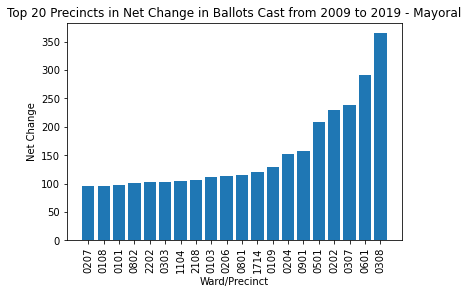

In [301]:
temp3 = df.sort_values(by=['M Net Change']).tail(20).reset_index(drop=False)
plt.bar(temp3['Ward/Precinct'],temp3['M Net Change'])
plt.xticks(rotation=90)
plt.title('Top 20 Precincts in Net Change in Ballots Cast from 2009 to 2019 - Mayoral')
plt.xlabel('Ward/Precinct')
plt.ylabel('Net Change')

In [302]:
filt = neighbs['WARD_PRECI'] == '0308'
neighbs[filt]
#Downtown/Chinatown/South End

,WARD_PRECI,NEIGHBORHOOD,%
118,0308,Leather District,0.0670
119,0308,Chinatown,0.3041
120,0308,South End,0.1570
121,0308,Beacon Hill,0.0001
122,0308,Downtown,0.4703


In [303]:
filt = neighbs['WARD_PRECI'] == '2106'
neighbs[filt]

,WARD_PRECI,NEIGHBORHOOD,%
270,2106,Brighton,0.2177
271,2106,Allston,0.7823


In [304]:
filt = neighbs['WARD_PRECI'] == '0301'
neighbs[filt]

,WARD_PRECI,NEIGHBORHOOD,%
123,0301,North End,0.6759
124,0301,Downtown,0.3214


In [305]:
overlap = []
for i in range(len(temp)):
    if temp.loc[i, 'Ward/Precinct'] in temp1['Ward/Precinct'].tolist():
        overlap.append(temp.loc[i, 'Ward/Precinct'])
overlap

['2017',
 '0703',
 '2016',
 '1808',
 '2015',
 '1902',
 '2003',
 '2010',
 '0702',
 '2005',
 '0609',
 '0608',
 '1820',
 '2006']

In [306]:
overlap2 = []
for i in range(len(temp2)):
    if temp2.loc[i, 'Ward/Precinct'] in temp3['Ward/Precinct'].tolist():
        overlap2.append(temp2.loc[i, 'Ward/Precinct'])
overlap2

['2202', '2108']

In [307]:
check = pd.DataFrame(columns=['Ward/Precinct', 'Neighborhood', 'White / POC 2009', 'White / POC 2017', 'White / POC 2019'])

for p in overlap:
    filt = neighbs['WARD_PRECI'] == p
    display(neighbs[filt])

,WARD_PRECI,NEIGHBORHOOD,%
298,2017,West Roxbury,0.9932


,WARD_PRECI,NEIGHBORHOOD,%
390,0703,South Boston,0.9769


,WARD_PRECI,NEIGHBORHOOD,%
292,2016,West Roxbury,0.9737


,WARD_PRECI,NEIGHBORHOOD,%
7,1808,Roslindale,0.2755
8,1808,Hyde Park,0.7245


,WARD_PRECI,NEIGHBORHOOD,%
289,2015,West Roxbury,0.9897


,WARD_PRECI,NEIGHBORHOOD,%
53,1902,Roslindale,0.0018
54,1902,Jamaica Plain,0.9977
55,1902,West Roxbury,0.0000


,WARD_PRECI,NEIGHBORHOOD,%
290,2003,West Roxbury,0.9980
291,2003,Hyde Park,0.0002


,WARD_PRECI,NEIGHBORHOOD,%
12,2010,Roslindale,0.0004
13,2010,West Roxbury,0.9996


,WARD_PRECI,NEIGHBORHOOD,%
391,0702,South Boston,1.0


,WARD_PRECI,NEIGHBORHOOD,%
293,2005,West Roxbury,0.9695


,WARD_PRECI,NEIGHBORHOOD,%
395,0609,South Boston,0.9869


,WARD_PRECI,NEIGHBORHOOD,%
394,0608,South Boston,1.0


,WARD_PRECI,NEIGHBORHOOD,%
301,1820,Hyde Park,0.9645


,WARD_PRECI,NEIGHBORHOOD,%
47,2006,Roslindale,0.0115
48,2006,Jamaica Plain,0.0079
49,2006,West Roxbury,0.9738


In [308]:
check1 = pd.DataFrame(columns=['Ward/Precinct', 'Neighborhood', 'White / POC 2009', 'White / POC 2017', 'White / POC 2019'])

for p in overlap2:
    filt = neighbs['WARD_PRECI'] == p
    display(neighbs[filt])

,WARD_PRECI,NEIGHBORHOOD,%
277,2202,Brighton,0.2317
278,2202,Allston,0.7683


,WARD_PRECI,NEIGHBORHOOD,%
259,2108,Brighton,0.5448
260,2108,Allston,0.4338


In [310]:
check['Ward/Precinct'] = overlap
for i in range(len(overlap)):
    filt = neighbs['WARD_PRECI'] == str(overlap[i])
    if len(str(overlap[i])) == 3:
        filt = neighbs['WARD_PRECI'] == '0' + str(overlap[i])
    temp = neighbs[filt].sort_values(by='%').reset_index(drop=False)
    check.loc[i, 'Neighborhood'] = temp.loc[0, 'NEIGHBORHOOD']

check = check.sort_values(by='Neighborhood').reset_index(drop=False).drop('index',axis=1)

for i in range(len(check)):
    wp = check.loc[i, 'Ward/Precinct']
    filt = cc09['Ward/Precinct'] == int(wp)
    if cc09[filt].reset_index(drop=False).loc[0, 'WHITE'] > 1 - cc09[filt].reset_index(drop=False).loc[0, 'WHITE']:
        check.loc[i, 'White / POC 2009'] = 'Majority White'
    else: 
        check.loc[i, 'White / POC 2009'] = 'Majority POC'
    filt = cc19['Ward/Precinct'] == int(wp)
    if cc19[filt].reset_index(drop=False).loc[0, 'WHITE'] > 1 - cc19[filt].reset_index(drop=False).loc[0, 'WHITE']:
        check.loc[i, 'White / POC 2019'] = 'Majority White'
    else: 
        check.loc[i, 'White / POC 2019'] = 'Majority POC'
    filt = m17['Ward_Precinct'] == int(wp)
    if m17[filt].reset_index(drop=False).loc[0, 'WHITE'] > 1 - m17[filt].reset_index(drop=False).loc[0, 'WHITE']:
        check.loc[i, 'White / POC 2017'] = 'Majority White'
    else: 
        check.loc[i, 'White / POC 2017'] = 'Majority POC'
        
check.loc[3, 'Neighborhood'] = 'Mostly Hyde Park, Partly Roslindale'
check

,Ward/Precinct,Neighborhood,White / POC 2009,White / POC 2017,White / POC 2019
0,2003,Hyde Park,Majority POC,Majority POC,Majority POC
1,1820,Hyde Park,Majority White,Majority POC,Majority POC
2,2006,Jamaica Plain,Majority White,Majority White,Majority White
3,1808,"Mostly Hyde Park, Partly Roslindale",Majority POC,Majority POC,Majority POC
4,2010,Roslindale,Majority White,Majority White,Majority White
5,0703,South Boston,Majority White,Majority White,Majority White
6,0702,South Boston,Majority White,Majority White,Majority White
7,0609,South Boston,Majority White,Majority White,Majority White
8,0608,South Boston,Majority White,Majority White,Majority White
9,2017,West Roxbury,Majority White,Majority White,Majority White


In [311]:
check1['Ward/Precinct'] = overlap2
for i in range(len(overlap2)):
    filt = neighbs['WARD_PRECI'] == str(overlap2[i])
    if len(str(overlap2[i])) == 3:
        filt = neighbs['WARD_PRECI'] == '0' + str(overlap2[i])
    temp = neighbs[filt].sort_values(by='%').reset_index(drop=False)
    check1.loc[i, 'Neighborhood'] = temp.loc[0, 'NEIGHBORHOOD']

check1 = check1.sort_values(by='Neighborhood').reset_index(drop=False).drop('index',axis=1)

for i in range(len(check1)):
    wp = check1.loc[i, 'Ward/Precinct']
    filt = cc09['Ward/Precinct'] == int(wp)
    if cc09[filt].reset_index(drop=False).loc[0, 'WHITE'] > 1 - cc09[filt].reset_index(drop=False).loc[0, 'WHITE']:
        check1.loc[i, 'White / POC 2009'] = 'Majority White'
    else: 
        check1.loc[i, 'White / POC 2009'] = 'Majority POC'
    filt = cc19['Ward/Precinct'] == int(wp)
    if cc19[filt].reset_index(drop=False).loc[0, 'WHITE'] > 1 - cc19[filt].reset_index(drop=False).loc[0, 'WHITE']:
        check1.loc[i, 'White / POC 2019'] = 'Majority White'
    else: 
        check1.loc[i, 'White / POC 2019'] = 'Majority POC'
    filt = m17['Ward_Precinct'] == int(wp)
    if m17[filt].reset_index(drop=False).loc[0, 'WHITE'] > 1 - m17[filt].reset_index(drop=False).loc[0, 'WHITE']:
        check1.loc[i, 'White / POC 2017'] = 'Majority White'
    else: 
        check1.loc[i, 'White / POC 2017'] = 'Majority POC'

check1

,Ward/Precinct,Neighborhood,White / POC 2009,White / POC 2017,White / POC 2019
0,2108,Allston,Majority White,Majority White,Majority White
1,2202,Brighton,Majority White,Majority White,Majority White


In [312]:
check1.loc[0,'Neighborhood'] = 'Brighton/Allston'
check1.loc[1, 'Neighborhood'] = 'Mostly Allston, Partly Brighton'
check1

,Ward/Precinct,Neighborhood,White / POC 2009,White / POC 2017,White / POC 2019
0,2108,Brighton/Allston,Majority White,Majority White,Majority White
1,2202,"Mostly Allston, Partly Brighton",Majority White,Majority White,Majority White
